## Project 3 Linear Regression Insurance Prediction

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score, r2_score, mean_squared_error, mean_absolute_error
from sklearn.preprocessing import minmax_scale, StandardScaler, robust_scale

from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

### Load the given dataset

In [2]:
df=pd.read_csv('Project_3_Linear_Regression_Insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


#### Check Null Value

In [4]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

#### No Null value

### so, we can go for data visulization

<AxesSubplot:xlabel='children', ylabel='age'>

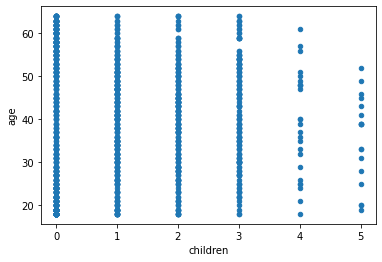

In [5]:
df.plot(kind='scatter',x='children',y='age')

In [6]:
# df.plot(kind='bar',x='bmi',y='children')

### Lable Encoding

In [7]:
labelencoder = LabelEncoder()

In [8]:
df[['sex','smoker','region']]=df[['sex','smoker','region']].apply(labelencoder.fit_transform)

###  Creat Feature & Target 

In [9]:
x=df.drop(['charges'], axis=1)

In [10]:
y=df['charges']

### Split data 

In [11]:
x_train, x_test, y_train, y_test=train_test_split(x,y, test_size=0.2,random_state=13)

In [12]:
x_test.shape

(268, 6)

## Model - LinearRegression

In [13]:
model=LinearRegression()

In [14]:
model.fit(x_train, y_train)

LinearRegression()

In [15]:
y_pred=model.predict(x_test)

In [20]:
print('Intercept:', model.intercept_)
print('r2_score :', r2_score(y_test, y_pred))
print('mse :',mean_squared_error(y_test,y_pred))
print('mae :',mean_absolute_error(y_test,y_pred))

Intercept: -11854.489246811865
r2_score : 0.7989255552370542
mse : 28580315.550320644
mae : 3804.7551761642317


### One Hot Encoding

In [21]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830
1334,18,0,31.920,0,0,0,2205.98080
1335,18,0,36.850,0,0,2,1629.83350
1336,21,0,25.800,0,0,3,2007.94500


In [22]:
dummi_df=pd.get_dummies(df)

In [23]:
dummi_df

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830
1334,18,0,31.920,0,0,0,2205.98080
1335,18,0,36.850,0,0,2,1629.83350
1336,21,0,25.800,0,0,3,2007.94500


## Creat Feature and Target

In [24]:
x=dummi_df.drop(['charges'], axis=1)
x.head()

,age,sex,bmi,children,smoker,region
0,19,0,27.900,0,1,3
1,18,1,33.770,1,0,2
2,28,1,33.000,3,0,2
3,33,1,22.705,0,0,1
4,32,1,28.880,0,0,1


In [25]:
y=dummi_df['charges']
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

## Split data into Test and Train

In [26]:
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.2, random_state=13)

In [27]:
model=LinearRegression()

In [28]:
model.fit(x_train,y_train)

LinearRegression()

In [29]:
y_pred=model.predict(x_test)

In [30]:
# print('Slope:' ,model.coef_) 
print('Intercept:', model.intercept_)
print('r2_score :', r2_score(y_test, y_pred))
print('mse :',mean_squared_error(y_test,y_pred))
print('mae :',mean_absolute_error(y_test,y_pred))

Intercept: -11854.489246811865
r2_score : 0.7989255552370542
mse : 28580315.550320644
mae : 3804.7551761642317


##  Apply All Model

In [31]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis

In [35]:
models={'lr':LinearRegression(),
        'ls':Lasso(),
        'rg':Ridge(),
        'dt':DecisionTreeRegressor(),
        'rf':RandomForestRegressor(),
        'knn':KNeighborsRegressor(),
        'svm':SVR(),
        'gb':GradientBoostingRegressor(),
        'ad':AdaBoostRegressor(),
#         'nb':GaussianNB()
       }

In [37]:
for name, model in models.items():
    model1=model.fit(x_train,y_train)
    y_pre = model1.predict(x_test)
    print(f'{name} Mean squared error:  {mean_squared_error(y_test,y_pred)}') 
    print(f'{name} R2 score:, {r2_score(y_test,y_pre)}\n')

lr Mean squared error:  28580315.550320644
lr R2 score:, 0.7989255552370542

ls Mean squared error:  28580315.550320644
ls R2 score:, 0.7989352332875246

rg Mean squared error:  28580315.550320644
rg R2 score:, 0.7988580026365457

dt Mean squared error:  28580315.550320644
dt R2 score:, 0.8144280234543153

rf Mean squared error:  28580315.550320644
rf R2 score:, 0.9014238649168833

knn Mean squared error:  28580315.550320644
knn R2 score:, 0.18143547628966228

svm Mean squared error:  28580315.550320644
svm R2 score:, -0.05532566225074942

gb Mean squared error:  28580315.550320644
gb R2 score:, 0.922998654878515

ad Mean squared error:  28580315.550320644
ad R2 score:, 0.8383712510312671



In [36]:
d={}
for name, model in models.items():
    model1=model.fit(x_train,y_train)
    y_pre = model1.predict(x_test)
    d[name]=model1.score(x_test, y_test)
dict(sorted(d.items(), key=lambda item: item[1],reverse=True))

{'gb': 0.9229643474554673,
 'rf': 0.9024849951354641,
 'dt': 0.830438168801535,
 'ad': 0.8188873920910484,
 'ls': 0.7989352332875246,
 'lr': 0.7989255552370542,
 'rg': 0.7988580026365457,
 'knn': 0.18143547628966228,
 'svm': -0.05532566225074942}

### GradientBoostingRegressor which shows best accuracy of nearly 92%